In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#
from datetime import datetime

In [2]:
SAdf = pd.read_csv('solar_angles_dataset.csv')
SAdf

Unnamed: 0 Date (M/D/YYYY) Time (H:MM:SS)  Topocentric zenith angle  \
0                0        1/1/2017        0:00:00                157.863107   
1                1        1/1/2017        0:15:00                160.034217   
2                2        1/1/2017        0:30:00                161.901608   
3                3        1/1/2017        0:45:00                163.360197   
4                4        1/1/2017        1:00:00                164.293788   
...            ...             ...            ...                       ...   
105211      105211        1/1/2020       22:45:00                144.648900   
105212      105212        1/1/2020       23:00:00                147.463622   
105213      105213        1/1/2020       23:15:00                150.216607   
105214      105214        1/1/2020       23:30:00                152.884991   
105215      105215        1/1/2020       23:45:00                155.437324   

        Top. azimuth angle (eastward from N)  \
0                                 308.657327   
1                                 316.136781   
2                                 325.052191   
3                                 335.548911   
4                                 347.499018   
...                                      ...   
105211                            284.820719   
105212                            288.398876   
105213                            292.424007   
105214                            297.022677   
105215                            302.358854   

        Top. azimuth angle (westward from S)    Julian day  
0                                 128.657327  2.457754e+06  
1                                 136.136781  2.457754e+06  
2                                 145.052191  2.457754e+06  
3                                 155.548911  2.457754e+06  
4                                 167.499018  2.457754e+06  
...                                      ...           ...  
105211                            104.820719  2.458850e+06  
105212                            108.398876  2.458850e+06  
105213                            112.424007  2.458850e+06  
105214                            117.022677  2.458850e+06  
105215                            122.358854  2.458850e+06  

[105216 rows x 7 columns]

In [3]:
def get_datetime_object_from_SAdf(SAdf_row_index):
    
    year = int(SAdf.iloc[SAdf_row_index]['Date (M/D/YYYY)'].split('/')[2])
    month = int(SAdf.iloc[SAdf_row_index]['Date (M/D/YYYY)'].split('/')[0])
    day = int(SAdf.iloc[SAdf_row_index]['Date (M/D/YYYY)'].split('/')[1])

    hour = int(SAdf.iloc[SAdf_row_index]['Time (H:MM:SS)'].split(':')[0])
    minute = int(SAdf.iloc[SAdf_row_index]['Time (H:MM:SS)'].split(':')[1])
    second = int(SAdf.iloc[SAdf_row_index]['Time (H:MM:SS)'].split(':')[2])

    return datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

In [4]:
datetime_list = [get_datetime_object_from_SAdf(i) for i in range(SAdf.shape[0])]
SAdf['datetime'] = pd.Series(datetime_list)
SAdf = SAdf.drop(['Date (M/D/YYYY)', 'Time (H:MM:SS)'], axis=1)

In [5]:
SAdf = SAdf.set_index('datetime')

In [6]:
SAdf

Unnamed: 0  Topocentric zenith angle  \
datetime                                                    
2017-01-01 00:00:00           0                157.863107   
2017-01-01 00:15:00           1                160.034217   
2017-01-01 00:30:00           2                161.901608   
2017-01-01 00:45:00           3                163.360197   
2017-01-01 01:00:00           4                164.293788   
...                         ...                       ...   
2020-01-01 22:45:00      105211                144.648900   
2020-01-01 23:00:00      105212                147.463622   
2020-01-01 23:15:00      105213                150.216607   
2020-01-01 23:30:00      105214                152.884991   
2020-01-01 23:45:00      105215                155.437324   

                     Top. azimuth angle (eastward from N)  \
datetime                                                    
2017-01-01 00:00:00                            308.657327   
2017-01-01 00:15:00                            316.136781   
2017-01-01 00:30:00                            325.052191   
2017-01-01 00:45:00                            335.548911   
2017-01-01 01:00:00                            347.499018   
...                                                   ...   
2020-01-01 22:45:00                            284.820719   
2020-01-01 23:00:00                            288.398876   
2020-01-01 23:15:00                            292.424007   
2020-01-01 23:30:00                            297.022677   
2020-01-01 23:45:00                            302.358854   

                     Top. azimuth angle (westward from S)    Julian day  
datetime                                                                 
2017-01-01 00:00:00                            128.657327  2.457754e+06  
2017-01-01 00:15:00                            136.136781  2.457754e+06  
2017-01-01 00:30:00                            145.052191  2.457754e+06  
2017-01-01 00:45:00                            155.548911  2.457754e+06  
2017-01-01 01:00:00                            167.499018  2.457754e+06  
...                                                   ...           ...  
2020-01-01 22:45:00                            104.820719  2.458850e+06  
2020-01-01 23:00:00                            108.398876  2.458850e+06  
2020-01-01 23:15:00                            112.424007  2.458850e+06  
2020-01-01 23:30:00                            117.022677  2.458850e+06  
2020-01-01 23:45:00                            122.358854  2.458850e+06  

[105216 rows x 5 columns]

In [7]:
Rdf = pd.read_csv('2017_2019.csv')

In [8]:
def get_datetime_object_from_Rdf_original(SAdf_row_index):
    
    year = int(Rdf.iloc[SAdf_row_index]['Year'])
    month = int(Rdf.iloc[SAdf_row_index]['Month'])
    day = int(Rdf.iloc[SAdf_row_index]['Day'])

    hour = int(Rdf.iloc[SAdf_row_index]['Hour'])
    minute = int(Rdf.iloc[SAdf_row_index]['Minute'])
    second = 0

    return datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)

In [9]:
datetime_list = [get_datetime_object_from_Rdf_original(i) for i in range(Rdf.shape[0])]
Rdf['datetime'] = pd.Series(datetime_list)
Rdf = Rdf.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

In [10]:
Rdf = Rdf.set_index('datetime')
Rdf

Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
datetime                                                                     
2017-01-01 00:00:00         -0.6             0             0             0   
2017-01-01 00:15:00         -0.6             0             0             0   
2017-01-01 00:30:00         -0.6             0             0             0   
2017-01-01 00:45:00         -0.6             0             0             0   
2017-01-01 01:00:00         -0.7             0             0             0   
...                          ...           ...           ...           ...   
2019-12-31 22:45:00          4.0             0             0             0   
2019-12-31 23:00:00          3.9             0             0             0   
2019-12-31 23:15:00          3.9             0             0             0   
2019-12-31 23:30:00          3.9             0             0             0   
2019-12-31 23:45:00          3.9             0             0             0   

                     Dew Point  DHI  DNI  GHI  Relative Humidity  \
datetime                                                           
2017-01-01 00:00:00       -2.6    0    0    0              86.29   
2017-01-01 00:15:00       -2.6    0    0    0              86.29   
2017-01-01 00:30:00       -2.6    0    0    0              86.29   
2017-01-01 00:45:00       -2.7    0    0    0              85.54   
2017-01-01 01:00:00       -2.7    0    0    0              86.17   
...                        ...  ...  ...  ...                ...   
2019-12-31 22:45:00        4.0    0    0    0             100.00   
2019-12-31 23:00:00        3.9    0    0    0             100.00   
2019-12-31 23:15:00        3.9    0    0    0             100.00   
2019-12-31 23:30:00        3.9    0    0    0             100.00   
2019-12-31 23:45:00        3.9    0    0    0             100.00   

                     Solar Zenith Angle  Surface Albedo  Pressure  Wind Speed  \
datetime                                                                        
2017-01-01 00:00:00              152.92            0.12      1003         1.7   
2017-01-01 00:15:00              150.22            0.12      1003         1.7   
2017-01-01 00:30:00              147.43            0.12      1003         1.7   
2017-01-01 00:45:00              144.60            0.12      1003         1.6   
2017-01-01 01:00:00              141.71            0.12      1003         1.6   
...                                 ...             ...       ...         ...   
2019-12-31 22:45:00              163.63            0.12       999         2.0   
2019-12-31 23:00:00              162.09            0.12       999         2.0   
2019-12-31 23:15:00              160.16            0.12       999         2.0   
2019-12-31 23:30:00              157.93            0.12       999         2.0   
2019-12-31 23:45:00              155.48            0.12       999         2.0   

                     Unnamed: 18  
datetime                          
2017-01-01 00:00:00          NaN  
2017-01-01 00:15:00          NaN  
2017-01-01 00:30:00          NaN  
2017-01-01 00:45:00          NaN  
2017-01-01 01:00:00          NaN  
...                          ...  
2019-12-31 22:45:00          NaN  
2019-12-31 23:00:00          NaN  
2019-12-31 23:15:00          NaN  
2019-12-31 23:30:00          NaN  
2019-12-31 23:45:00          NaN  

[105120 rows x 14 columns]

In [11]:
SAdf_datetimes = SAdf.index
Rdf_datetimes = Rdf.index

for datetime_value in SAdf_datetimes:
    if datetime_value not in Rdf_datetimes:
        SAdf = SAdf.drop(datetime_value, axis=0)

In [12]:
SAdf.shape

(105120, 5)

In [13]:
Rdf.shape

(105120, 14)

In [14]:
df = pd.concat([SAdf, Rdf], axis=1)

In [15]:
df = df.drop(['Unnamed: 0', 'Unnamed: 18', 'Top. azimuth angle (westward from S)', 'Julian day', 'Clearsky DHI', 'Clearsky GHI', 'Clearsky DNI'], axis=1)

In [16]:
df

Topocentric zenith angle  \
datetime                                        
2017-01-01 00:00:00                157.863107   
2017-01-01 00:15:00                160.034217   
2017-01-01 00:30:00                161.901608   
2017-01-01 00:45:00                163.360197   
2017-01-01 01:00:00                164.293788   
...                                       ...   
2019-12-31 22:45:00                144.783756   
2019-12-31 23:00:00                147.598548   
2019-12-31 23:15:00                150.351476   
2019-12-31 23:30:00                153.019537   
2019-12-31 23:45:00                155.571040   

                     Top. azimuth angle (eastward from N)  Temperature  \
datetime                                                                 
2017-01-01 00:00:00                            308.657327         -0.6   
2017-01-01 00:15:00                            316.136781         -0.6   
2017-01-01 00:30:00                            325.052191         -0.6   
2017-01-01 00:45:00                            335.548911         -0.6   
2017-01-01 01:00:00                            347.499018         -0.7   
...                                                   ...          ...   
2019-12-31 22:45:00                            284.815483          4.0   
2019-12-31 23:00:00                            288.399718          3.9   
2019-12-31 23:15:00                            292.434205          3.9   
2019-12-31 23:30:00                            297.047016          3.9   
2019-12-31 23:45:00                            302.404303          3.9   

                     Dew Point  DHI  DNI  GHI  Relative Humidity  \
datetime                                                           
2017-01-01 00:00:00       -2.6    0    0    0              86.29   
2017-01-01 00:15:00       -2.6    0    0    0              86.29   
2017-01-01 00:30:00       -2.6    0    0    0              86.29   
2017-01-01 00:45:00       -2.7    0    0    0              85.54   
2017-01-01 01:00:00       -2.7    0    0    0              86.17   
...                        ...  ...  ...  ...                ...   
2019-12-31 22:45:00        4.0    0    0    0             100.00   
2019-12-31 23:00:00        3.9    0    0    0             100.00   
2019-12-31 23:15:00        3.9    0    0    0             100.00   
2019-12-31 23:30:00        3.9    0    0    0             100.00   
2019-12-31 23:45:00        3.9    0    0    0             100.00   

                     Solar Zenith Angle  Surface Albedo  Pressure  Wind Speed  
datetime                                                                       
2017-01-01 00:00:00              152.92            0.12      1003         1.7  
2017-01-01 00:15:00              150.22            0.12      1003         1.7  
2017-01-01 00:30:00              147.43            0.12      1003         1.7  
2017-01-01 00:45:00              144.60            0.12      1003         1.6  
2017-01-01 01:00:00              141.71            0.12      1003         1.6  
...                                 ...             ...       ...         ...  
2019-12-31 22:45:00              163.63            0.12       999         2.0  
2019-12-31 23:00:00              162.09            0.12       999         2.0  
2019-12-31 23:15:00              160.16            0.12       999         2.0  
2019-12-31 23:30:00              157.93            0.12       999         2.0  
2019-12-31 23:45:00              155.48            0.12       999         2.0  

[105120 rows x 12 columns]

# Data Exploration

### Dependent Variables
- Topocentric zenith angle: angle between the sun's rays and the vertical.
- Top. azimuth angle (eastward from N): This horizontal coordinate defines the Sun's relative direction along the local horizon

### Independent Variables
- Clearsky DHI: Clearsky of Diffuse Horizontal Irradiance
- Clearsky DNI: Clearsky of Direct Normal Irradiance
- Clearsky GHI: Clearsky of Global Horizontal Irradiance

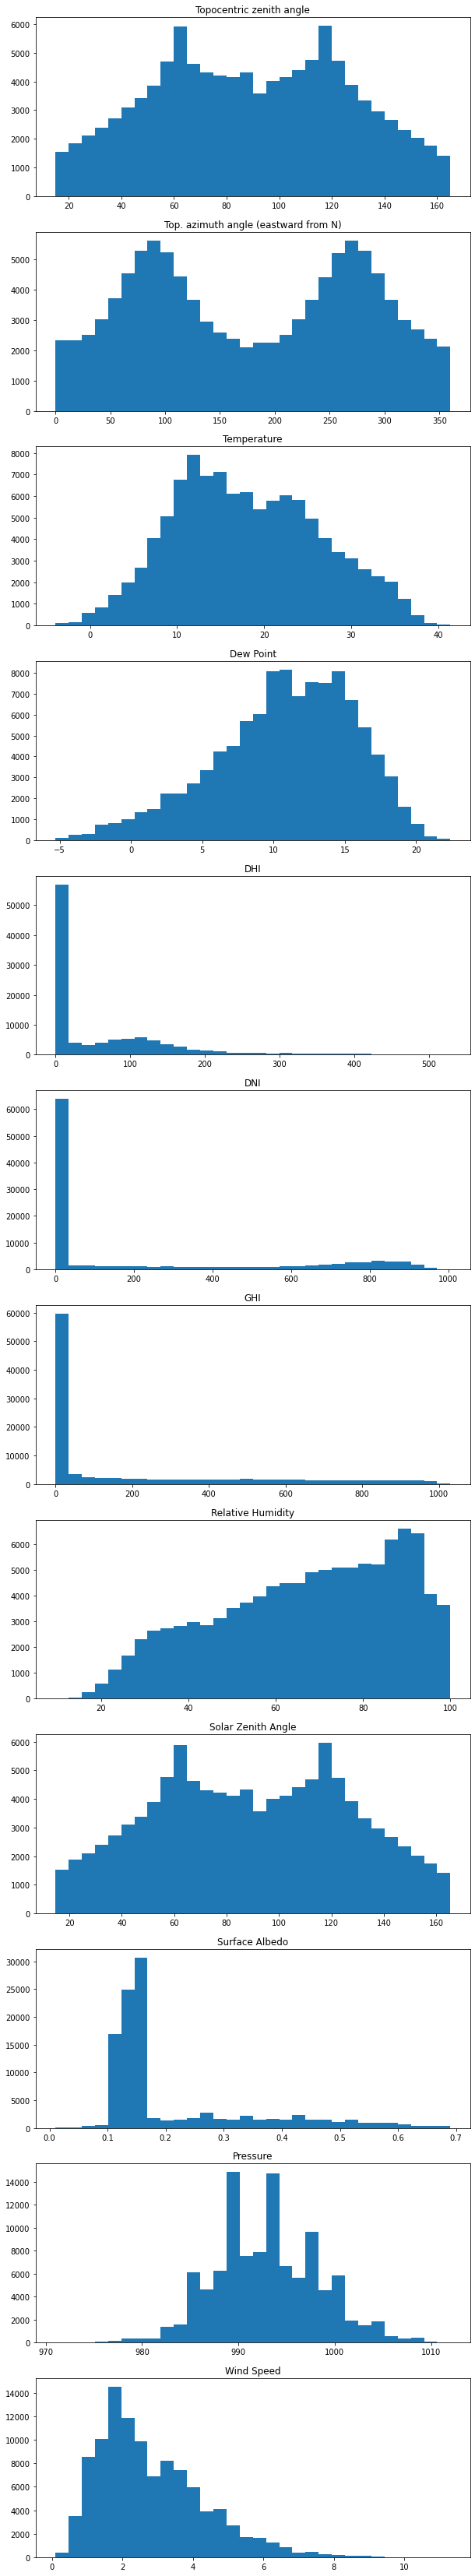

In [17]:
n_cols = df.shape[1]

fig, axs = plt.subplots(n_cols, figsize=(10, 60))

for i in range(n_cols):
    column_name = df.columns[i]
    axs[i].hist(df[column_name], bins=30)
    axs[i].set_title(column_name)

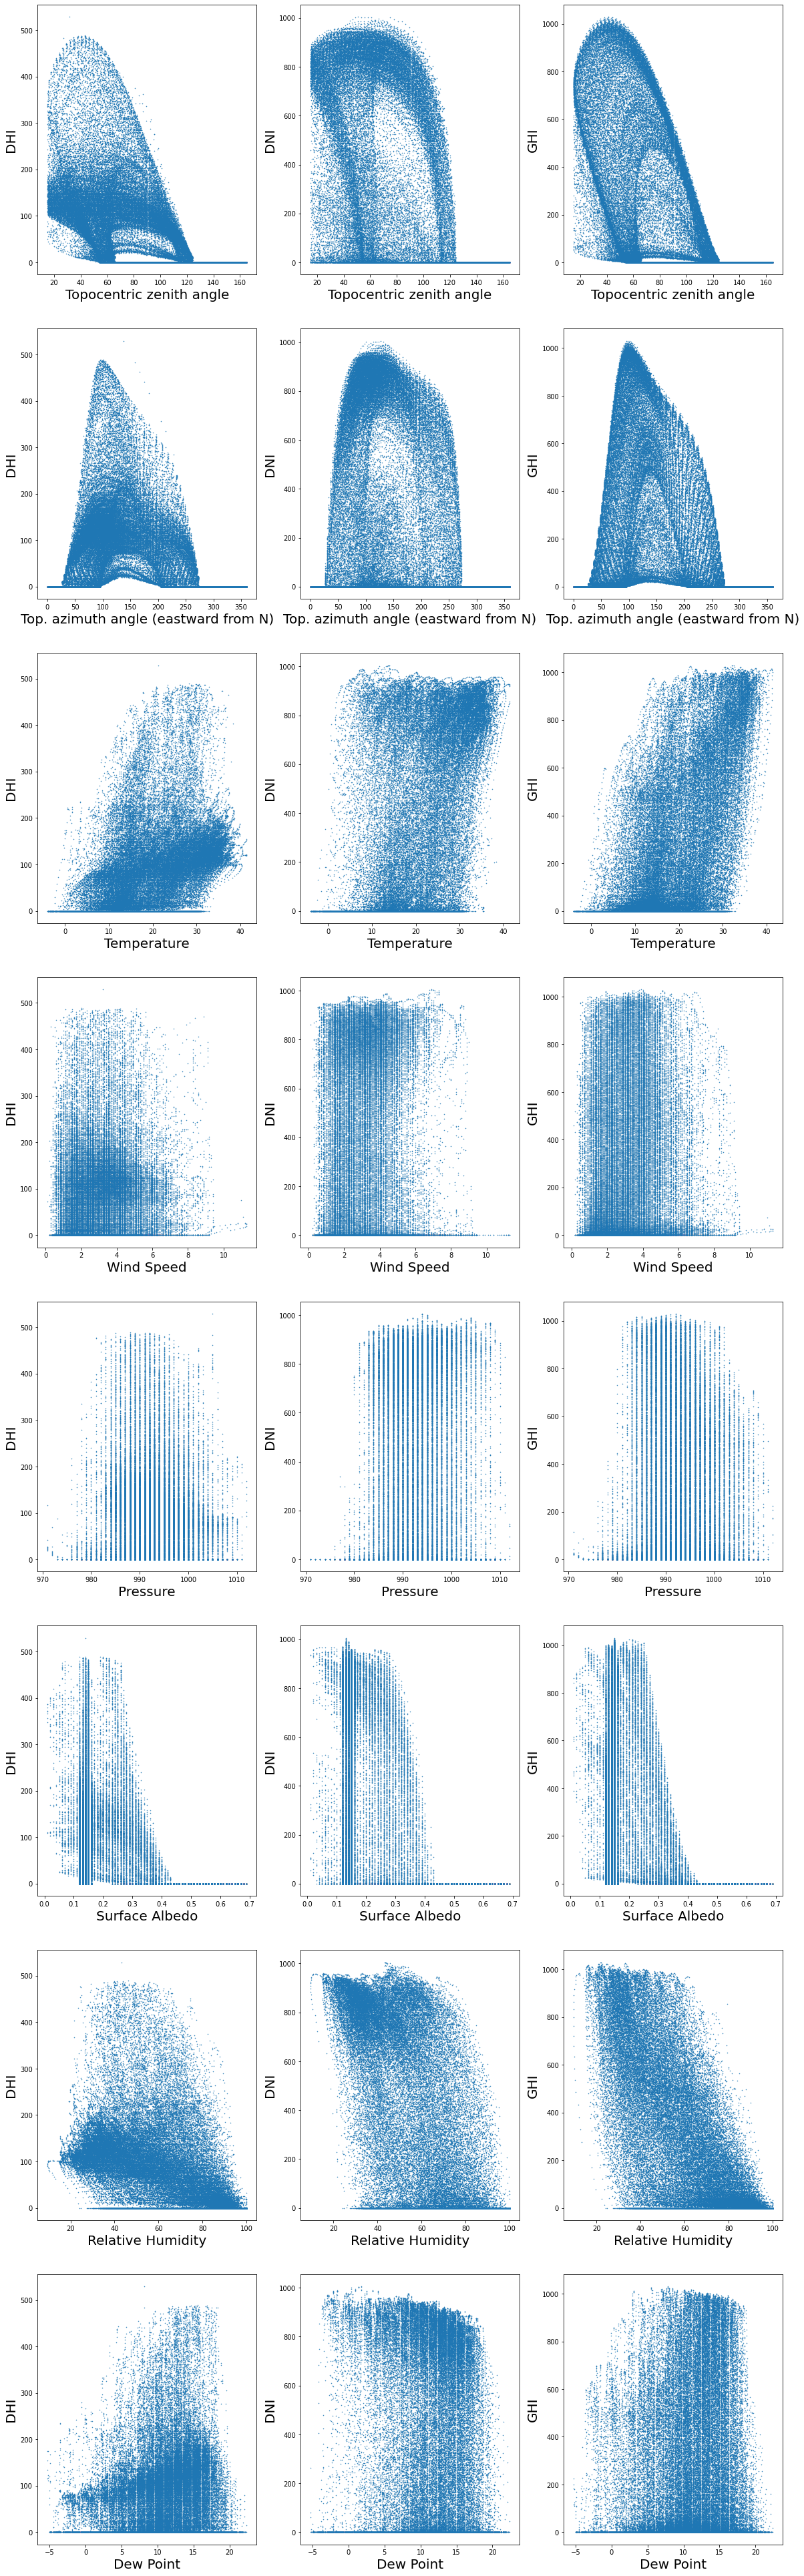

In [54]:
dependent_variables = ['Topocentric zenith angle', 'Top. azimuth angle (eastward from N)', 'Temperature', 'Wind Speed', 'Pressure', 'Surface Albedo', 'Relative Humidity', 'Dew Point']
independent_variables = ['DHI', 'DNI', 'GHI']

fig, axs = plt.subplots(len(dependent_variables), len(independent_variables), figsize=(20, 70))

row = 1
col = 1


for i in range(len(dependent_variables)):
    for j in range(len(independent_variables)):
        
        x = df[dependent_variables[i]]
        y = df[independent_variables[j]]

        axs[row - 1, col - 1].scatter(x, y, s=0.25)
        axs[row - 1, col - 1].set_xlabel(dependent_variables[i], fontsize=20)
        axs[row - 1, col - 1].set_ylabel(independent_variables[j], fontsize=20)

        if col % len(independent_variables) == 0:
            row += 1
            col = 1
        else:
            col += 1

In [19]:
def get_cost(predicted_y, actual_y):
    cost = 0
    m = len(predicted_y)
    for i in range(m):
        cost += 1 / (2 * m) * (predicted_y[i] - actual_y[i]) ** 2
    return cost

In [20]:
def get_average_relative_error(predicted_y, actual_y):
    return np.sqrt(get_cost(predicted_y, actual_y)) / np.average(actual_y)

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [24]:
df

Topocentric zenith angle  \
datetime                                        
2017-01-01 00:00:00                157.863107   
2017-01-01 00:15:00                160.034217   
2017-01-01 00:30:00                161.901608   
2017-01-01 00:45:00                163.360197   
2017-01-01 01:00:00                164.293788   
...                                       ...   
2019-12-31 22:45:00                144.783756   
2019-12-31 23:00:00                147.598548   
2019-12-31 23:15:00                150.351476   
2019-12-31 23:30:00                153.019537   
2019-12-31 23:45:00                155.571040   

                     Top. azimuth angle (eastward from N)  Temperature  \
datetime                                                                 
2017-01-01 00:00:00                            308.657327         -0.6   
2017-01-01 00:15:00                            316.136781         -0.6   
2017-01-01 00:30:00                            325.052191         -0.6   
2017-01-01 00:45:00                            335.548911         -0.6   
2017-01-01 01:00:00                            347.499018         -0.7   
...                                                   ...          ...   
2019-12-31 22:45:00                            284.815483          4.0   
2019-12-31 23:00:00                            288.399718          3.9   
2019-12-31 23:15:00                            292.434205          3.9   
2019-12-31 23:30:00                            297.047016          3.9   
2019-12-31 23:45:00                            302.404303          3.9   

                     Dew Point  DHI  DNI  GHI  Relative Humidity  \
datetime                                                           
2017-01-01 00:00:00       -2.6    0    0    0              86.29   
2017-01-01 00:15:00       -2.6    0    0    0              86.29   
2017-01-01 00:30:00       -2.6    0    0    0              86.29   
2017-01-01 00:45:00       -2.7    0    0    0              85.54   
2017-01-01 01:00:00       -2.7    0    0    0              86.17   
...                        ...  ...  ...  ...                ...   
2019-12-31 22:45:00        4.0    0    0    0             100.00   
2019-12-31 23:00:00        3.9    0    0    0             100.00   
2019-12-31 23:15:00        3.9    0    0    0             100.00   
2019-12-31 23:30:00        3.9    0    0    0             100.00   
2019-12-31 23:45:00        3.9    0    0    0             100.00   

                     Solar Zenith Angle  Surface Albedo  Pressure  Wind Speed  
datetime                                                                       
2017-01-01 00:00:00              152.92            0.12      1003         1.7  
2017-01-01 00:15:00              150.22            0.12      1003         1.7  
2017-01-01 00:30:00              147.43            0.12      1003         1.7  
2017-01-01 00:45:00              144.60            0.12      1003         1.6  
2017-01-01 01:00:00              141.71            0.12      1003         1.6  
...                                 ...             ...       ...         ...  
2019-12-31 22:45:00              163.63            0.12       999         2.0  
2019-12-31 23:00:00              162.09            0.12       999         2.0  
2019-12-31 23:15:00              160.16            0.12       999         2.0  
2019-12-31 23:30:00              157.93            0.12       999         2.0  
2019-12-31 23:45:00              155.48            0.12       999         2.0  

[105120 rows x 12 columns]

In [67]:
x = np.array(df['Top. azimuth angle (eastward from N)']).reshape(-1, 1)
y = df['DHI']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(get_cost(train_predictions, y_train))
print(get_cost(test_predictions, y_test))
print(get_average_relative_error(test_predictions, y_test))

3369.478436556311
3480.7544336233645
0.9700055186070876


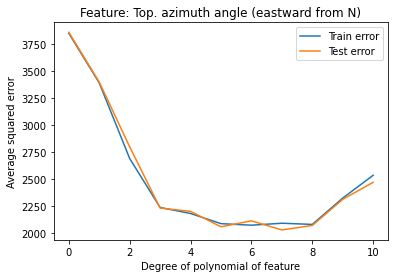

In [75]:
import math

x = df['Top. azimuth angle (eastward from N)']
y = df['DHI']

polynomial_degrees = [i for i in range(11)]

model_parameters = []
train_cost = []
test_cost = []

for degree in range(1, 12):
    X = np.array([x ** deg for deg in range(degree)]).transpose()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linear_regression = linear_model.LinearRegression()
    model = linear_regression.fit(X_train, y_train)

    parameters = [linear_regression.intercept_]
    for param in linear_regression.coef_:
        parameters.append(param)
    
    model_parameters.append(parameters)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    my_test_predictions = []
    for x_variable in x:
        counter = 0
        for param in parameters:
            counter += param * x_variable
        my_test_predictions.append(counter)

    train_cost.append(get_cost(train_predictions, y_train))
    test_cost.append(get_cost(test_predictions, y_test))

fig, axs = plt.subplots(1)
axs.plot(polynomial_degrees, train_cost, label='Train error')
axs.plot(polynomial_degrees, test_cost, label='Test error')
axs.set_ylabel('Average squared error')
axs.set_xlabel('Degree of polynomial of feature')
axs.set_title('Feature: Top. azimuth angle (eastward from N)')

axs.legend()
plt.show()

In [79]:
chosen_degree = test_cost.index(np.min(test_cost))
chosen_parameters = model_parameters[chosen_degree]

x = df['Top. azimuth angle (eastward from N)']
y = df['DHI']

X = np.array([x ** deg for deg in range(1, chosen_degree+1)]).transpose()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(get_cost(train_predictions, y_train))
print(get_cost(test_predictions, y_test))
print(get_average_relative_error(test_predictions, y_test))

2072.0882813205644
2106.757143682655
0.7603185767871063


In [60]:
def get_predicted_values_from_polynomial_feature(input_features, parameters):
    return [sum([feature_value ** power * parameters[power] for power in range(len(parameters))]) for feature_value in input_features]

In [61]:
import plotly.express as px

dict = {}
dict['azimuth_angles'] = np.linspace(0, 360, 20)

dict['predicted_dhi'] = get_predicted_values_from_polynomial_feature(dict['azimuth_angles'], chosen_parameters)

df_angle = pd.DataFrame(data=dict)

fig = px.scatter_polar(df_angle, r="predicted_dhi", theta="azimuth_angles")
fig.show()

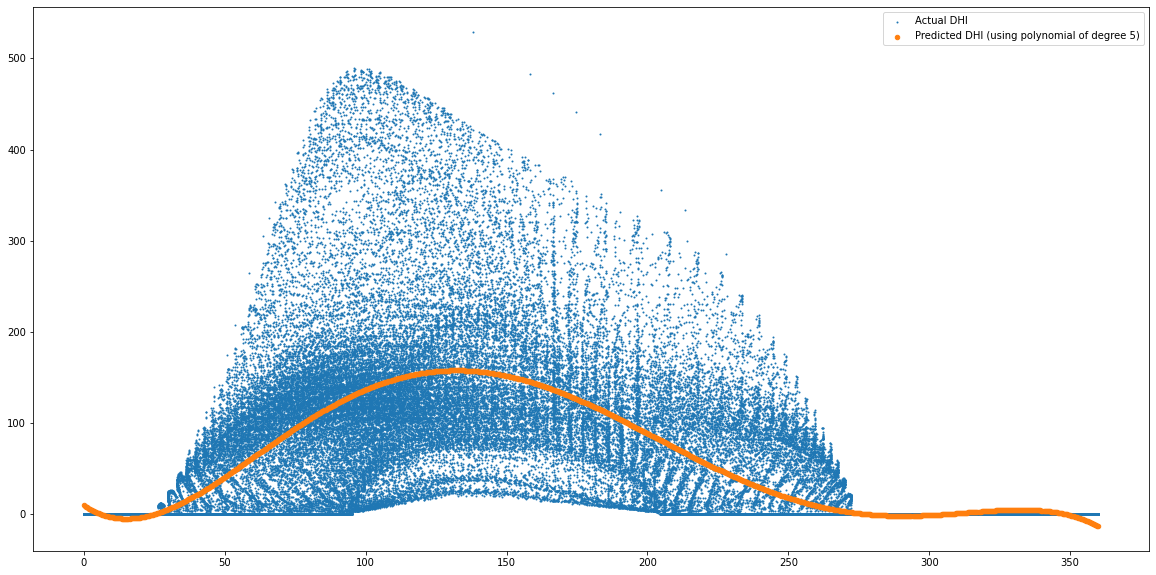

In [63]:
fig, axs = plt.subplots(figsize=(20, 10))
plt.scatter(df['Top. azimuth angle (eastward from N)'], df['DHI'], s=1, label='Actual DHI')

azimuth_angles = np.linspace(0, 360, 1000)
predicted_dhi = get_predicted_values_from_polynomial_feature(azimuth_angles, chosen_parameters)

plt.scatter(azimuth_angles, predicted_dhi, s=20, label=f'Predicted DHI (using polynomial of degree {index + 1})')
plt.legend()

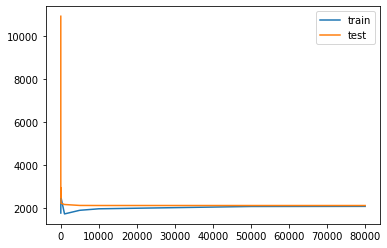

In [80]:
def plot_learning_curves(X_train, y_train, X_test, y_test):
    train_cost = []
    test_cost = []

    num_training_examples = [25, 30, 35, 40, 45, 50, 100, 1000, 5000, 10000, 50000, 80000]

    for i in num_training_examples:
        model = linear_regression.fit(X_train[:i], y_train[:i])
        train_predictions = model.predict(X_train[:i])
        test_predictions = model.predict(X_test)

        train_cost.append(get_cost(train_predictions, y_train[:i]))
        test_cost.append(get_cost(test_predictions, y_test))

    fig, axs = plt.subplots(1)
    axs.plot(num_training_examples, train_cost, label='train')
    axs.plot(num_training_examples, test_cost, label='test')

    axs.legend()
    plt.show()

plot_learning_curves(X_train, y_train, X_test, y_test)

In [82]:
X = df.drop(independent_variables, axis=1)
y = df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = linear_regression.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(get_cost(train_predictions, y_train))
print(get_cost(test_predictions, y_test))
print(get_average_relative_error(test_predictions, y_test))

1558.9638886514836
1564.9922183552158
0.6616372123438404


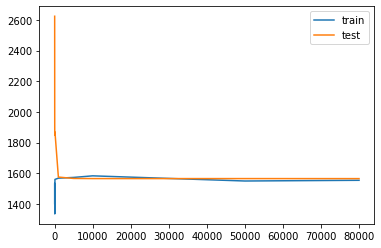

In [83]:
plot_learning_curves(X_train, y_train, X_test, y_test)

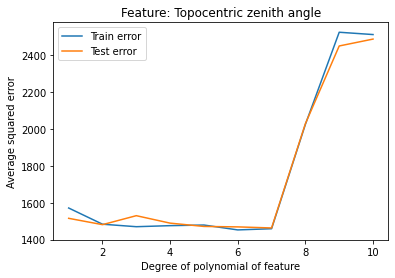

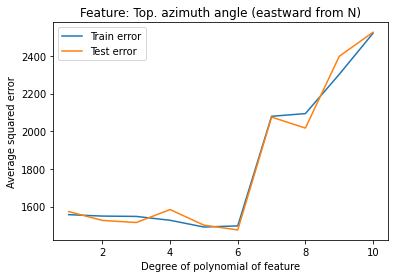

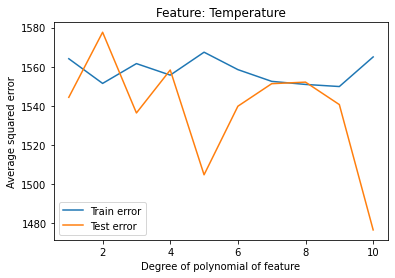

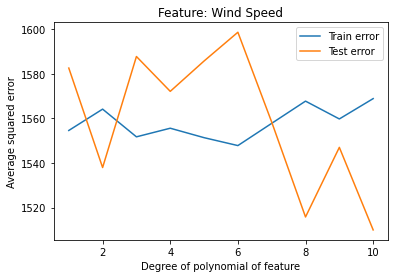

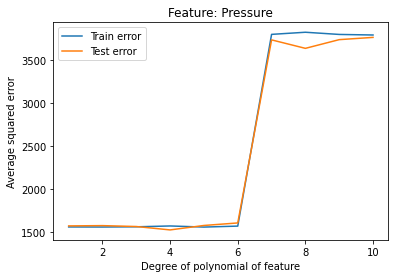

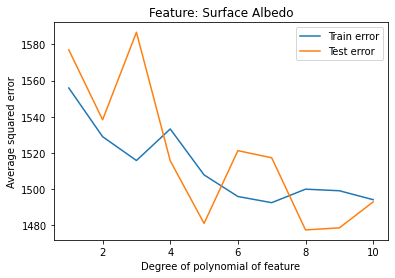

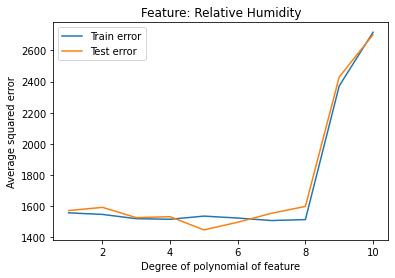

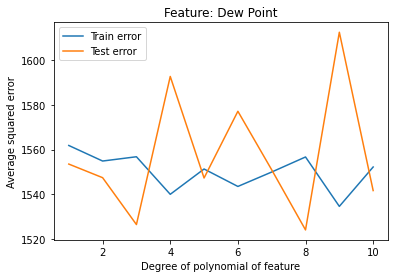

In [ ]:
def plot_errors_against_degree_of_feature(df, feature, independent_variable):
    x = df[feature]
    y = df[independent_variable]

    df_copy = df.copy(deep=False)

    polynomial_degrees = [i for i in range(1, 11)]

    train_cost = []
    test_cost = []

    for degree in polynomial_degrees:
        if degree > 1:
            df_copy[f'{feature} ^ {degree}'] = x ** degree
        X = df_copy.drop(independent_variables, axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = linear_regression.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_cost.append(get_cost(train_predictions, y_train))
        test_cost.append(get_cost(test_predictions, y_test))

    fig, axs = plt.subplots(1)
    axs.plot(polynomial_degrees, train_cost, label='Train error')
    axs.plot(polynomial_degrees, test_cost, label='Test error')
    axs.set_ylabel('Average squared error')
    axs.set_xlabel('Degree of polynomial of feature')
    axs.set_title(f'Feature: {feature}')

    axs.legend()
    plt.show()

for variable in dependent_variables:
    plot_errors_against_degree_of_feature(df, variable, 'DHI')